# <u> Combine Google Trends with other Time Series Data </u>

<img src='https://img-b.udemycdn.com/redactor/raw/2020-10-10_10-30-21-9b8bd58ba8815919292f5bc49591dbd3.png' >

### Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [12]:
df_tesla.head()
df_tesla.shape
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [16]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [14]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [19]:
df_unemployment.head()
df_unemployment.shape
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [21]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [22]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [25]:
df_btc_search.head()
df_btc_search.shape
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [26]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [27]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

In [29]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [34]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')
df_btc_price.head()

Missing values for BTC price?: False


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [32]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [33]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [47]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [43]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [44]:
df_btc_search.MONTH.head()

0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data


In [48]:
df_btc_price.shape
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

In [49]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [61]:
# Create locators for ticks on the time axis
year = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

### Tesla Stock Price v.s. Search Volume

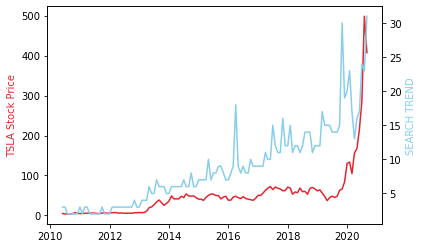

In [51]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E")
ax2.set_ylabel("SEARCH TREND", color="skyblue")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue")

### Make the chart larger and easier to read. 


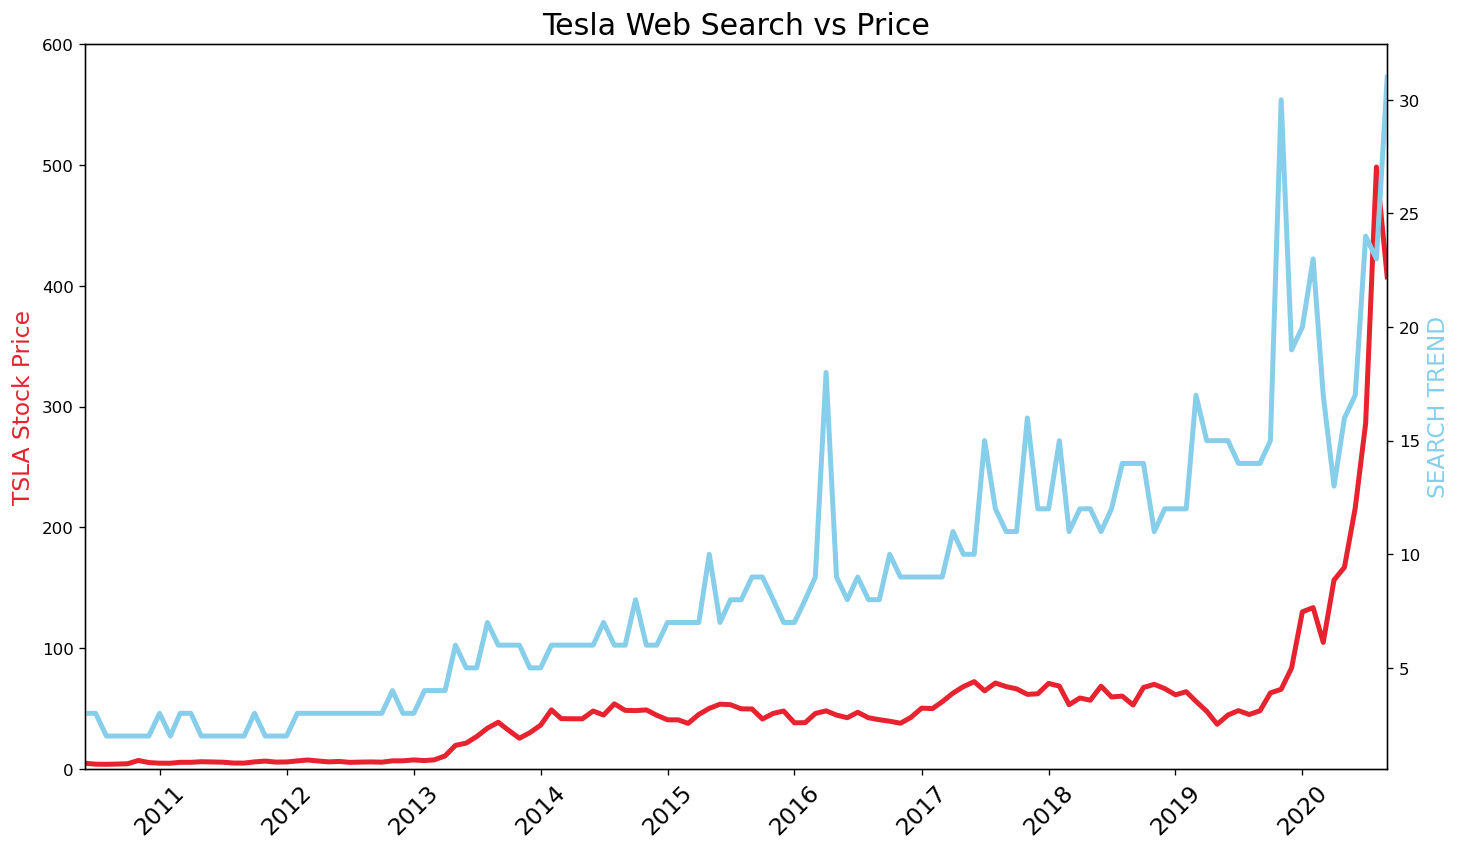

In [56]:
plt.figure(figsize=[14, 8], dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="skyblue", fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue", linewidth=3)

How to add tick formatting for dates on the x-axis. 

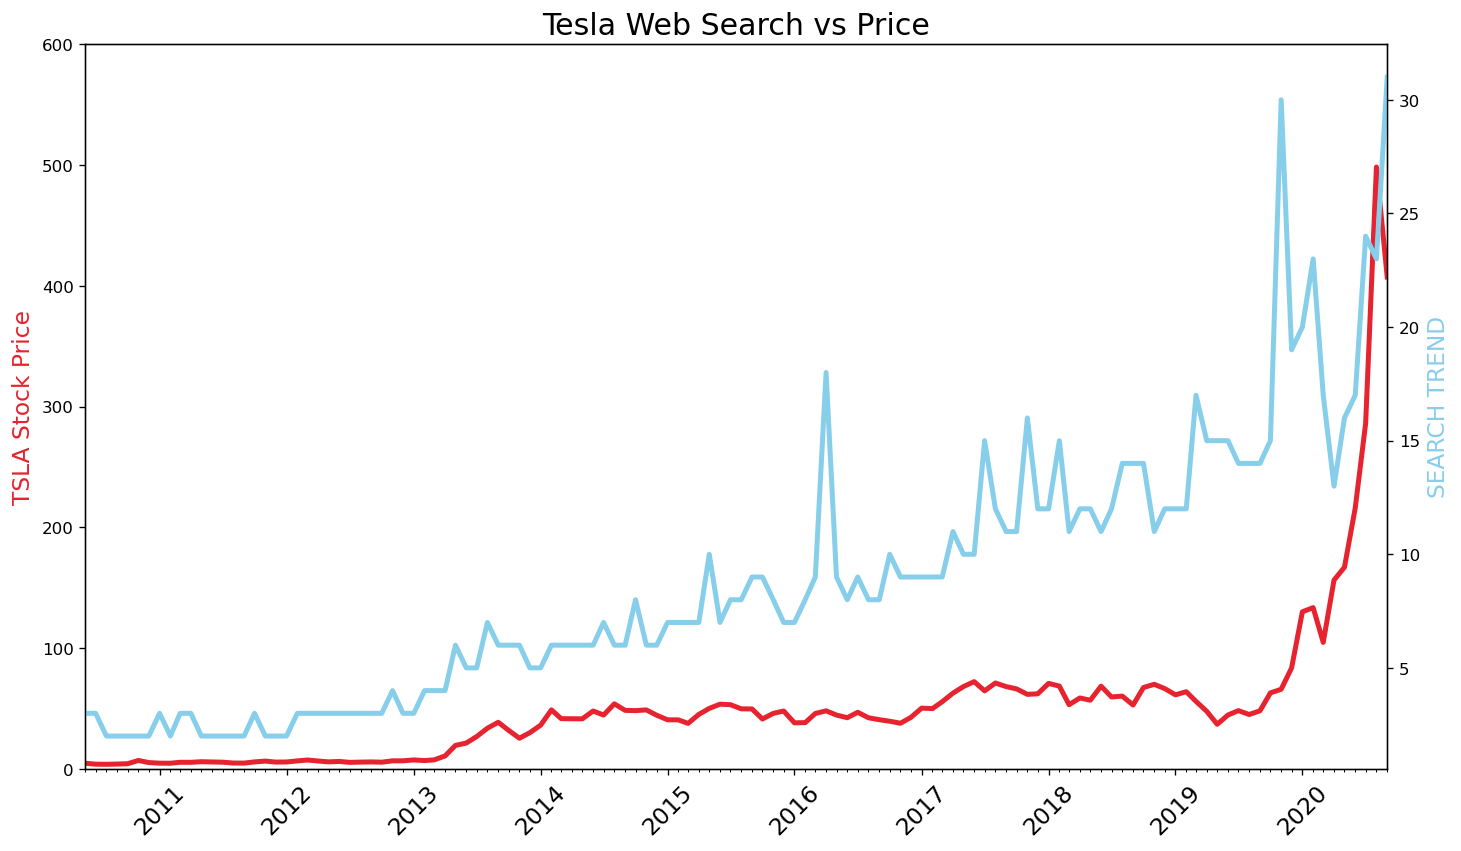

In [67]:
plt.figure(figsize=[14, 8], dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("SEARCH TREND", color="skyblue", fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue", linewidth=3)

### Bitcoin (BTC) Price v.s. Search Volume

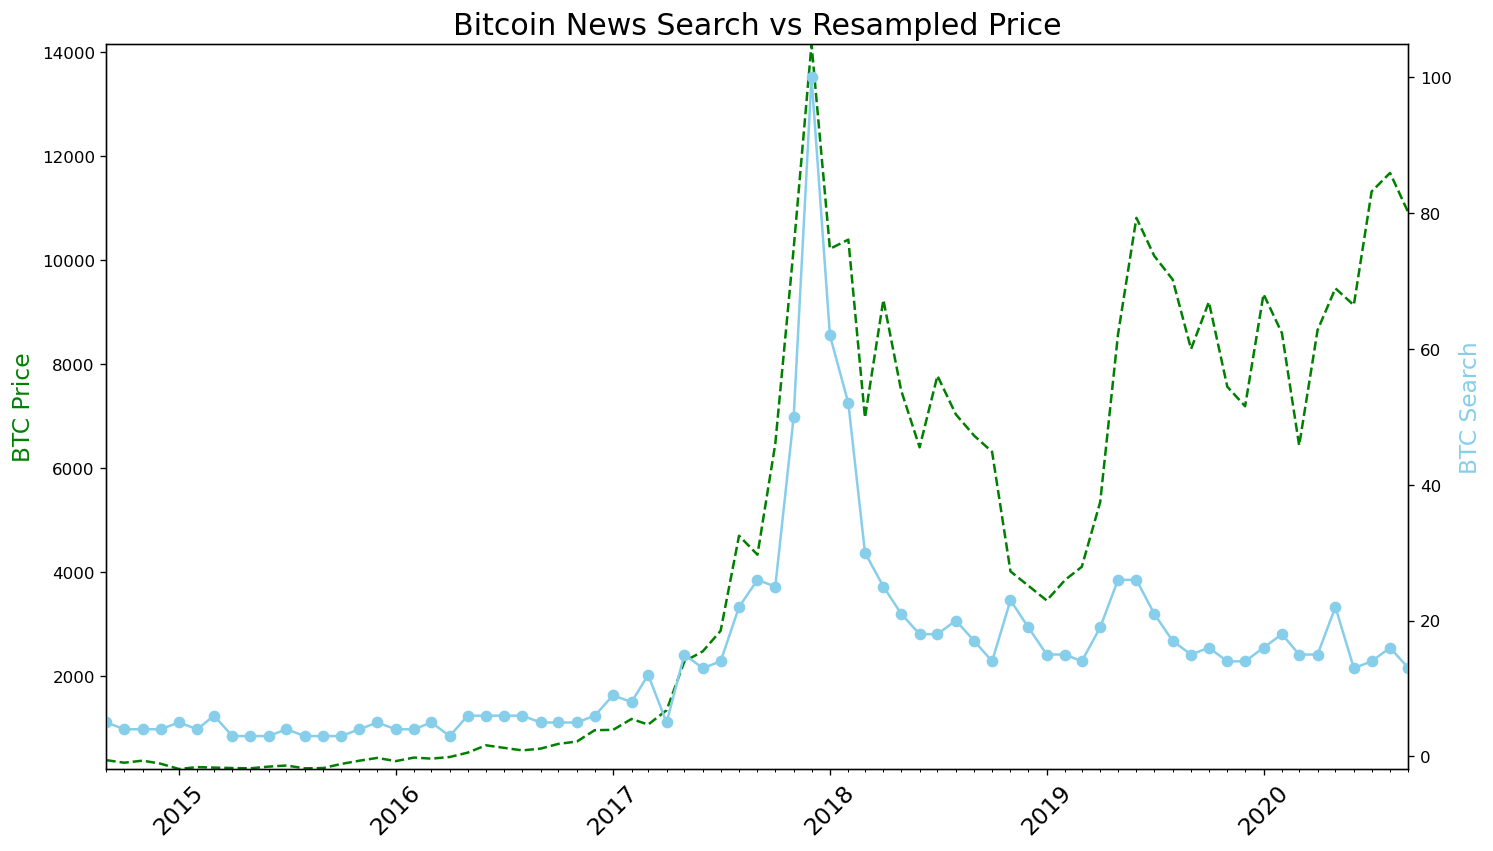

In [72]:
plt.figure(figsize=[14, 8], dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([df_btc_monthly.CLOSE.min(), df_btc_monthly.CLOSE.max()])
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])

ax1.set_ylabel("BTC Price", fontsize=14, color="green")
ax2.set_ylabel("BTC Search", fontsize=14, color="skyblue")

ax1.plot(df_btc_search.MONTH, df_btc_monthly.CLOSE, color="green", linestyle='dashed')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="skyblue", marker='o')

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

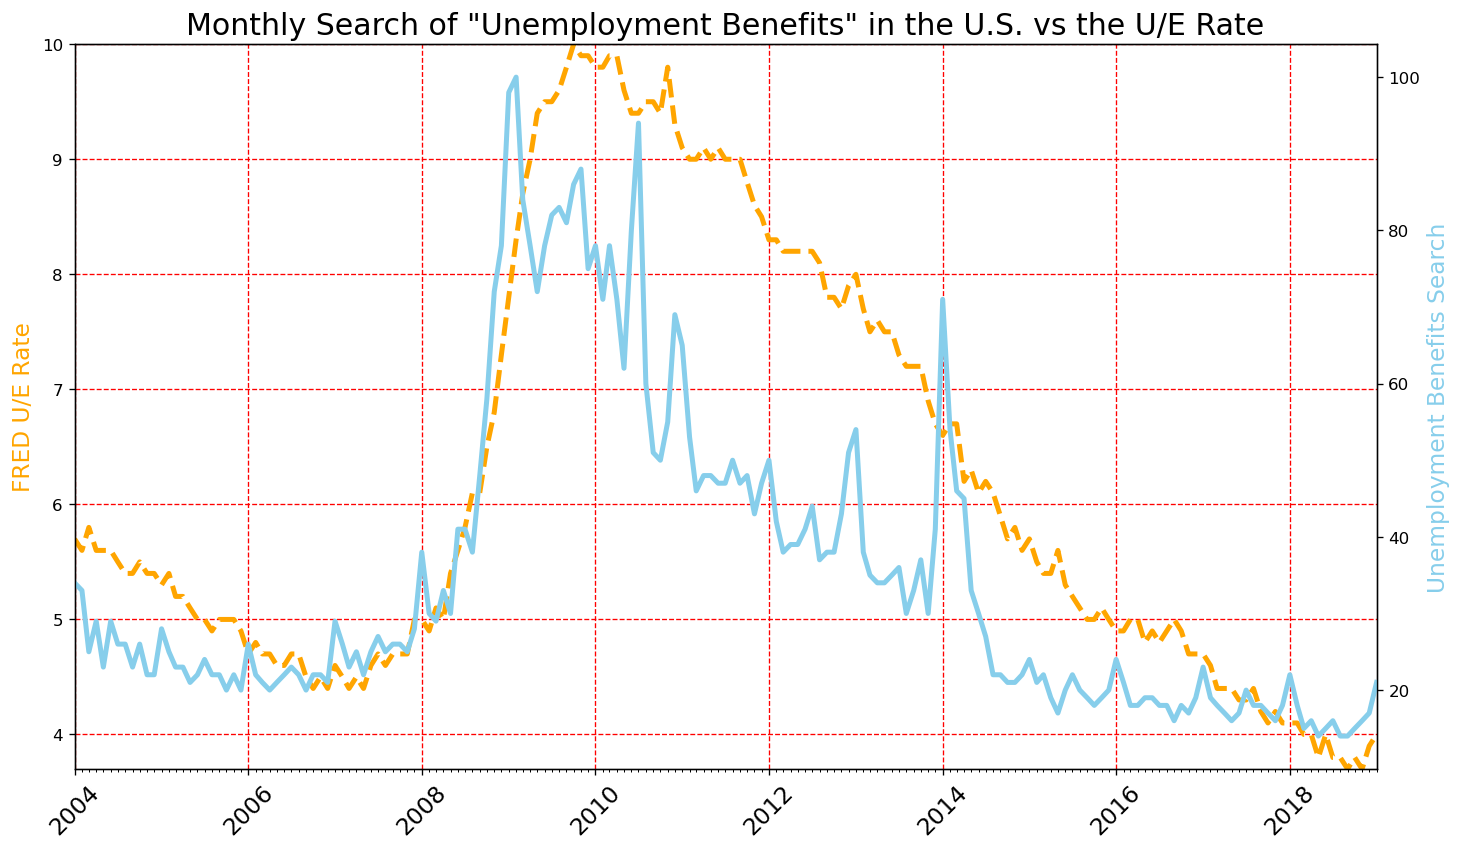

In [77]:
plt.figure(figsize=[14, 8], dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

plt.grid(color="r", linestyle="dashed")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([df_unemployment.UNRATE.min(), df_unemployment.UNRATE.max()])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="orange")
ax2.set_ylabel("Unemployment Benefits Search", fontsize=14, color="skyblue")

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="orange", linestyle='dashed', linewidth=3)
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)

Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


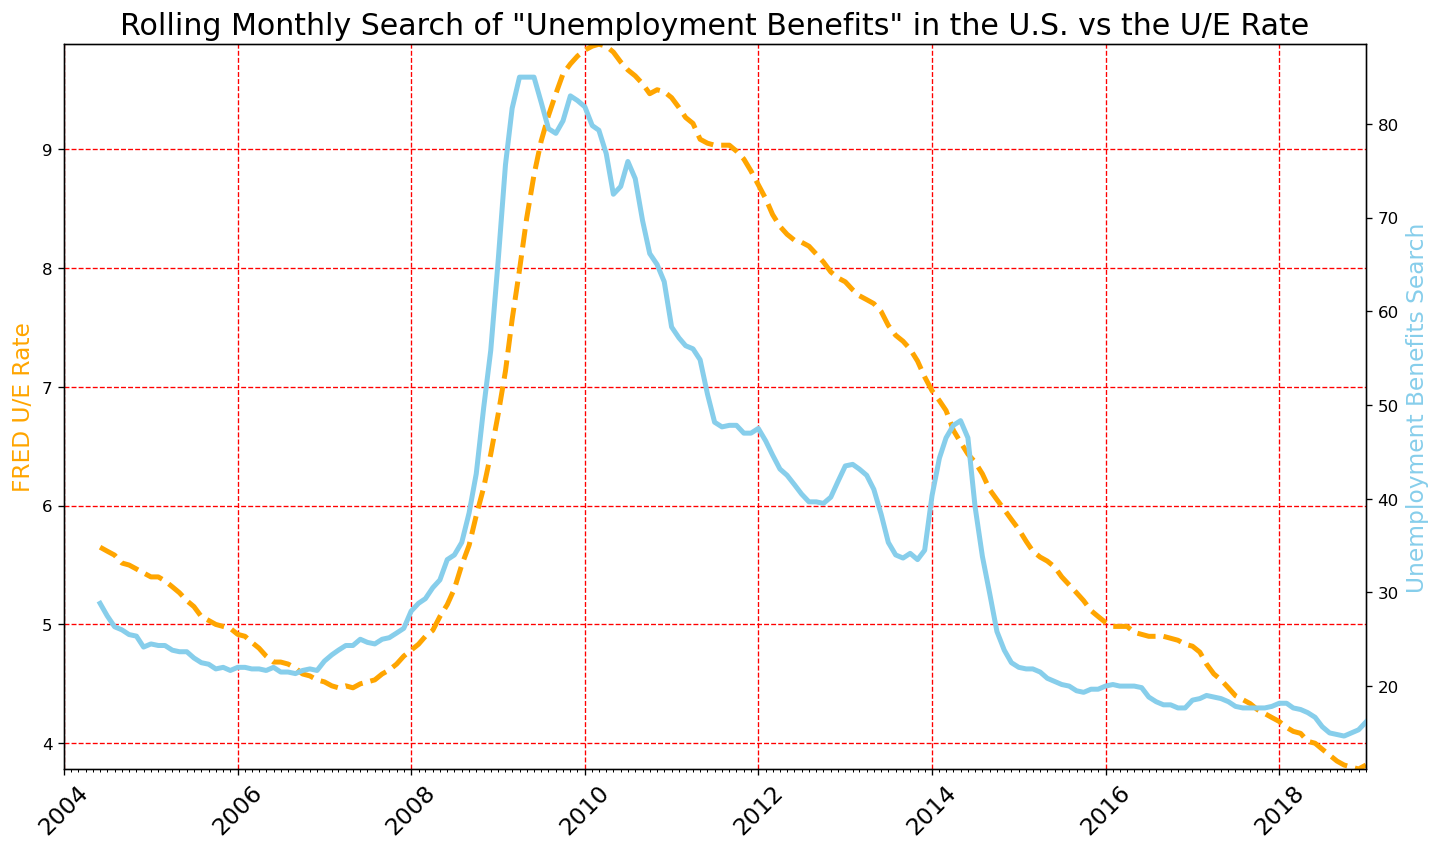

In [80]:
# roll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

plt.figure(figsize=[14, 8], dpi=120)
plt.title('Rolling Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

plt.grid(color="r", linestyle="dashed")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([roll_df.UNRATE.min(), roll_df.UNRATE.max()])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="orange")
ax2.set_ylabel("Unemployment Benefits Search", fontsize=14, color="skyblue")

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="orange", linestyle='dashed', linewidth=3)
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)

### Including 2020 in Unemployment Charts

Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [82]:
df_ue_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [84]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
df_ue_2020.MONTH.head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

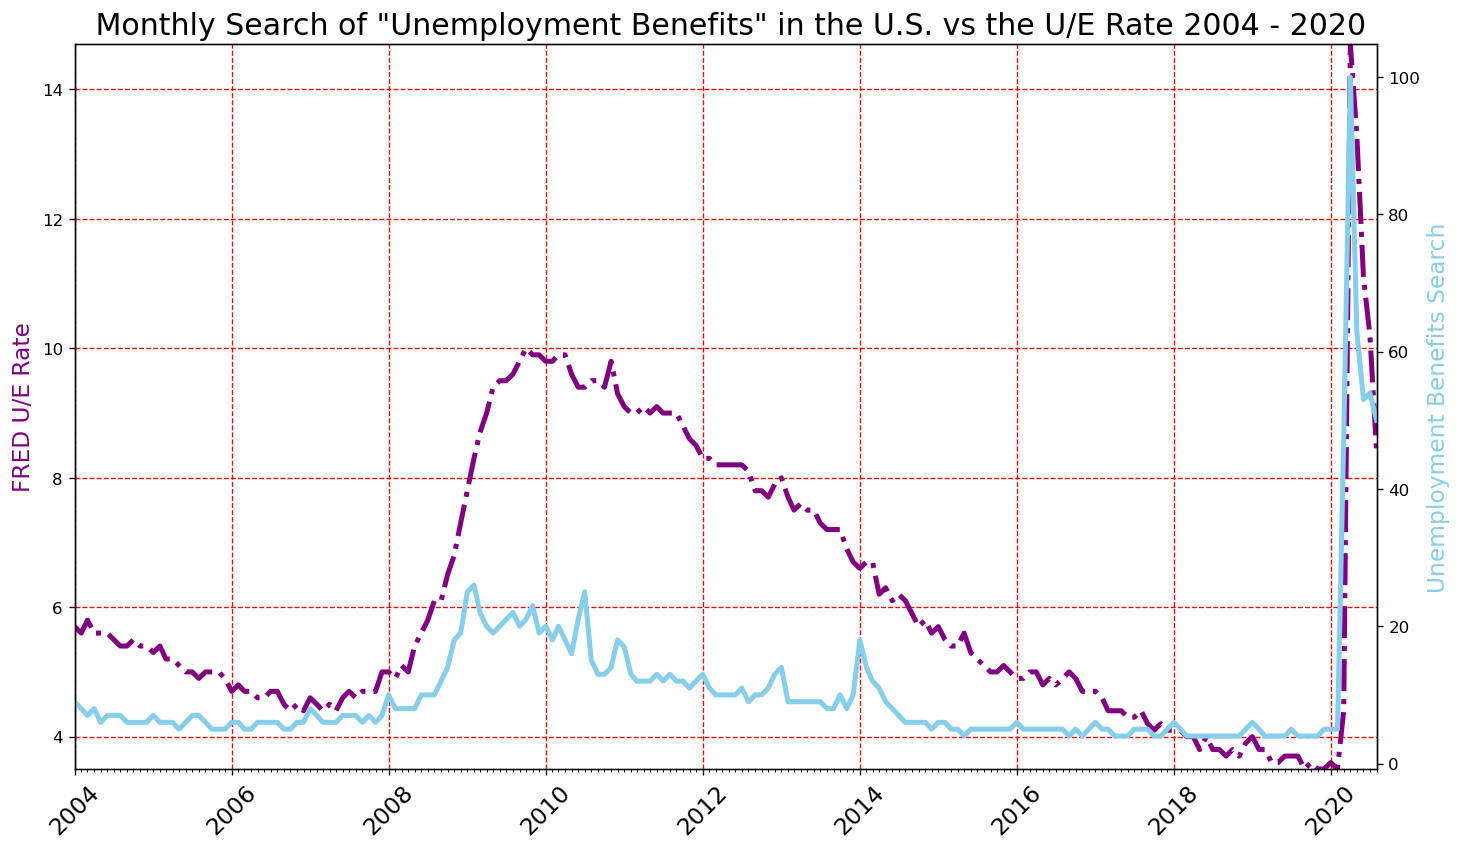

In [87]:
plt.figure(figsize=[14, 8], dpi=120)
plt.title(' Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate 2004 - 2020', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

plt.grid(color="r", linestyle="dashed")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([df_ue_2020.UNRATE.min(), df_ue_2020.UNRATE.max()])
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="purple")
ax2.set_ylabel("Unemployment Benefits Search", fontsize=14, color="skyblue")

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color="purple", linestyle='-.', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)